# 결측치와 이상치

## Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('figure', figsize=(10, 6))

from matplotlib import rcParams
rcParams['font.family'] = 'DejaVu Serif'
rcParams['font.size'] = 10
rcParams['axes.unicode_minus'] = False

In [ ]:
!pip install mglearn

## Missing Value - 결측치
#### NaN 처리 메서드

인자 | 설명
:---|:---
dropna | 누락된 데이터가 있는 축(로우, 칼럼)을 제외시킨다. 어느 정도의 누락 데이터까지 용인할 것인지 지정할 수 있다.
fillna | 누락된 데이터를 대신할 값을 채우거나 'ffill' 또는 'bfill' 같은 보간 메서드를 적용한다.
isnull | 누락되거나 NA인 값을 알려주는 불리언 값이 저장된, 같은 형의 객체를 반환한다.
notnull | isnull과 반대되는 메서드다.

### dropna

In [ ]:
df = pd.DataFrame([[1, 6.5, 3, np.nan],
                   [1, np.nan, np.nan, np.nan],
                   [np.nan, np.nan, np.nan, np.nan],
                   [np.nan, 6.5, 3, np.nan]])
df

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [ ]:
# NaN이 하나라도 있으면 drop
df.dropna()

,0,1,2,3


In [ ]:
# 모든 값이 NaN인 로우만 삭제
df.dropna(how='all')

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [ ]:
# 행방향 처리
df.dropna(axis=0, how='all')

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [ ]:
# 열방향 처리
df.dropna(axis=1, how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [ ]:
df.dropna(thresh=3)

#정상 데이터가 3개 이상인 행을 남겨라

,0,1,2,3
0,1.0,6.5,3.0,NaN


### fillna
#### fillna 함수 인자

인자 | 설명
:---|:---
value | 비어있는 값을 채울 스칼라 값이나 사전 형식의 객체
method | 보간 방식. 기본적으로 'ffill'을 사용한다.
axis | 값을 채워 넣을 축. 기본 값은 0
inplace | 복사본을 생성하지 않고 호출한 객체를 변경한다. 기본값은 False
limit | 값을 앞 혹은 뒤에서 몇 개까지 채울지를 지정한다.

In [ ]:
#df.fillna(0, inplace=True) # 원본 수정
df.fillna(0)

,0,1,2,3
0,1.0,6.5,3.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,6.5,3.0,0.0


In [ ]:
# 컬럼별로 값 지정
df.fillna({1: 0.5, 3: -1})

,0,1,2,3
0,1.0,6.5,3.0,-1.0
1,1.0,0.5,NaN,-1.0
2,NaN,0.5,NaN,-1.0
3,NaN,6.5,3.0,-1.0


In [ ]:
df = pd.DataFrame(np.random.randn(6, 3))
df.loc[2:, 1] = np.nan
df.loc[4:, 2] = np.nan
df

,0,1,2
0,0.353954,-0.476027,0.878401
1,0.308764,0.261600,-1.856092
2,1.115496,NaN,-0.828687
3,1.264970,NaN,-0.113027
4,1.779046,NaN,NaN
5,-0.490440,NaN,NaN


In [ ]:
df.fillna(method='ffill')

,0,1,2
0,0.353954,-0.476027,0.878401
1,0.308764,0.261600,-1.856092
2,1.115496,0.261600,-0.828687
3,1.264970,0.261600,-0.113027
4,1.779046,0.261600,-0.113027
5,-0.490440,0.261600,-0.113027


In [ ]:
df.fillna(method='ffill', limit=2)

,0,1,2
0,0.353954,-0.476027,0.878401
1,0.308764,0.261600,-1.856092
2,1.115496,0.261600,-0.828687
3,1.264970,0.261600,-0.113027
4,1.779046,NaN,-0.113027
5,-0.490440,NaN,-0.113027


In [ ]:
sr = pd.Series([1., np.nan, 3.5, np.nan, 7])
sr

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [ ]:
sr.fillna(sr.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

## Outlier - 이상치

### Define function - vp_drop_outlier()
* Usually data out range of 1.5 IQR are called outliers.

In [ ]:
def vp_drop_outlier(df, col, weight=1.5):
    sr = df[col]

    q25 = np.percentile(sr.values, 25)
    q75 = np.percentile(sr.values, 75)

    iqr   = q75 - q25
    iqr_w = iqr * weight

    val_l = q25 - iqr_w
    val_h = q75 + iqr_w

    outlier_index = sr[(sr < val_l) | (sr > val_h)].index

    df_res = df.drop(outlier_index).copy()

    return df_res

### Applying

#### Create DataFrame

In [ ]:
df = pd.DataFrame({'col1': range(100,110),
                   'col2': range(100,110),
                   'col3': range(100,110)})
df.loc[0,'col1'] = 95
df.loc[1,'col1'] = 115

df.loc[2,'col2'] = 92
df.loc[3,'col2'] = 117

df.loc[4,'col3'] = 90
df.loc[5,'col3'] = 120

In [ ]:
df

,col1,col2,col3
0,95,100,100
1,115,101,101
2,102,92,102
3,103,117,103
4,104,104,90
5,105,105,120
6,106,106,106
7,107,107,107
8,108,108,108
9,109,109,109


#### Box Plot

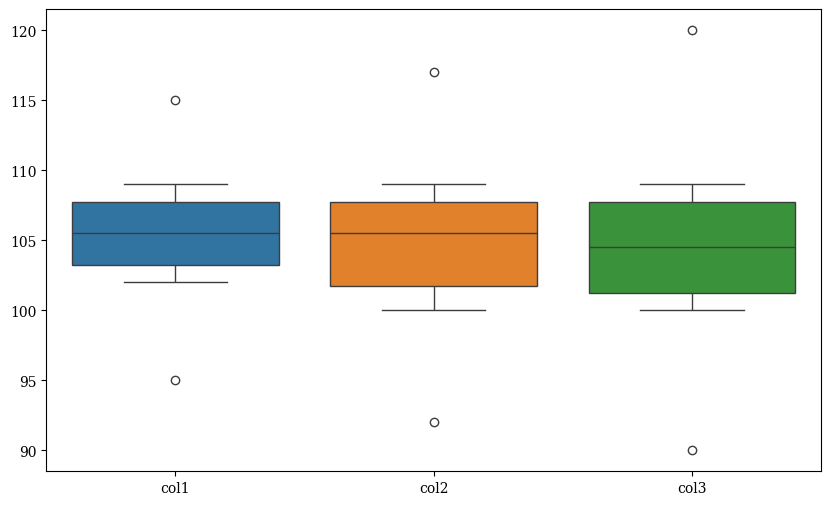

In [ ]:
sns.boxplot(data=df)
plt.show()

#### drop outlier - col1

In [ ]:
vp_drop_outlier(df,'col1')

,col1,col2,col3
2,102,92,102
3,103,117,103
4,104,104,90
5,105,105,120
6,106,106,106
7,107,107,107
8,108,108,108
9,109,109,109


#### drop outlier - col2

In [ ]:
vp_drop_outlier(df,'col2')

,col1,col2,col3
0,95,100,100
1,115,101,101
4,104,104,90
5,105,105,120
6,106,106,106
7,107,107,107
8,108,108,108
9,109,109,109


#### drop outlier - col3

In [ ]:
vp_drop_outlier(df,'col3')

,col1,col2,col3
0,95,100,100
1,115,101,101
2,102,92,102
3,103,117,103
6,106,106,106
7,107,107,107
8,108,108,108
9,109,109,109
